
(a) How did you access the dataset? Accessed through Kaggle by downloading it from the (https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/data).

Source: The dataset is sourced from Kaggle and contains CO2 emission data for various sectors.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/FinalProject/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CO2_Emissions.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/FinalProject


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
print("Dataset Info:")
df.info()

print("\n Summary Statistics")
print(df.describe)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64

In [ ]:
# Selecting relevant numerical columns for outlier detection
num_cols = ["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)",
            "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)",
            "Fuel Consumption Comb (mpg)", "CO2 Emissions(g/km)"]


# Compute Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))

# Mark outliers in the dataset
df["Outlier_IQR"] = outliers.any(axis=1)

# Count the number of detected outliers
outlier_count = df["Outlier_IQR"].sum()
print(f"Total number of outliers detected: {outlier_count}")






Total number of outliers detected: 559


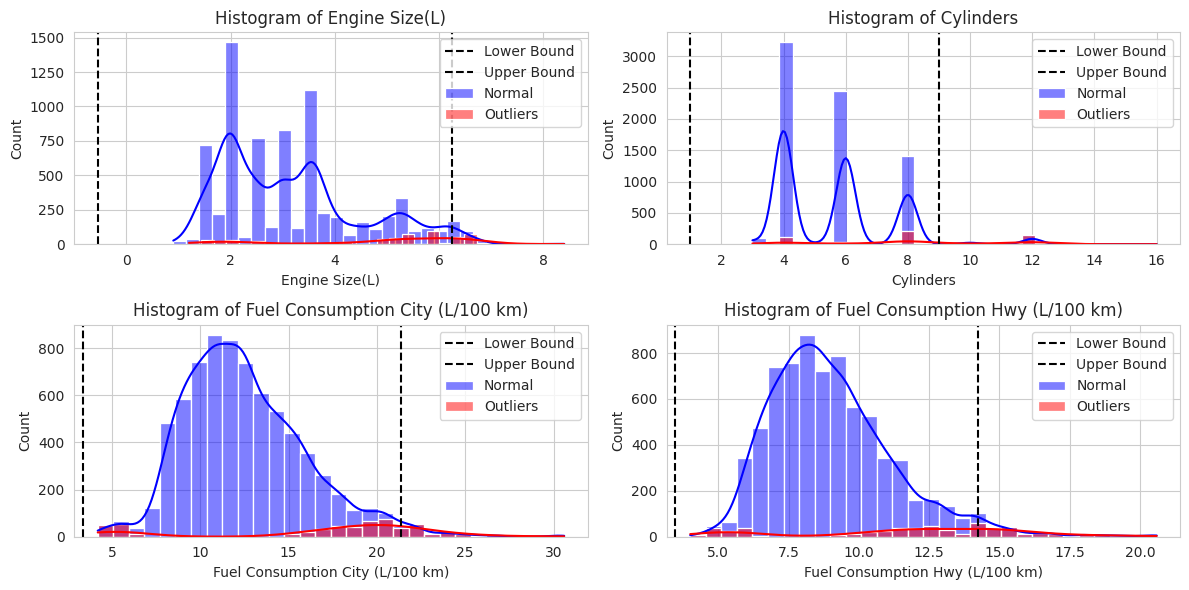

In [ ]:
# Plot histograms of numerical features with outliers highlighted
plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols[:4]):  # Plot first 4 columns for better visualization
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue', label="Normal")
    sns.histplot(df[df["Outlier_IQR"]][col], bins=30, kde=True, color='red', label="Outliers")
    plt.axvline(lower_bound[col], color='black', linestyle='dashed', label="Lower Bound")
    plt.axvline(upper_bound[col], color='black', linestyle='dashed', label="Upper Bound")
    plt.legend()
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [ ]:
#clean the unwanted data ('Make and MOdel')
df = df.drop(columns=['Make','Model'])

#convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Vehicle Class','Transmission','Fuel Type'])
df.info, df.head()

(<bound method DataFrame.info of       Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
 0                2.0          4                               9.9   
 1                2.4          4                              11.2   
 2                1.5          4                               6.0   
 3                3.5          6                              12.7   
 4                3.5          6                              12.1   
 ...              ...        ...                               ...   
 7380             2.0          4                              10.7   
 7381             2.0          4                              11.2   
 7382             2.0          4                              11.7   
 7383             2.0          4                              11.2   
 7384             2.0          4                              12.2   
 
       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
 0                                 6.7            

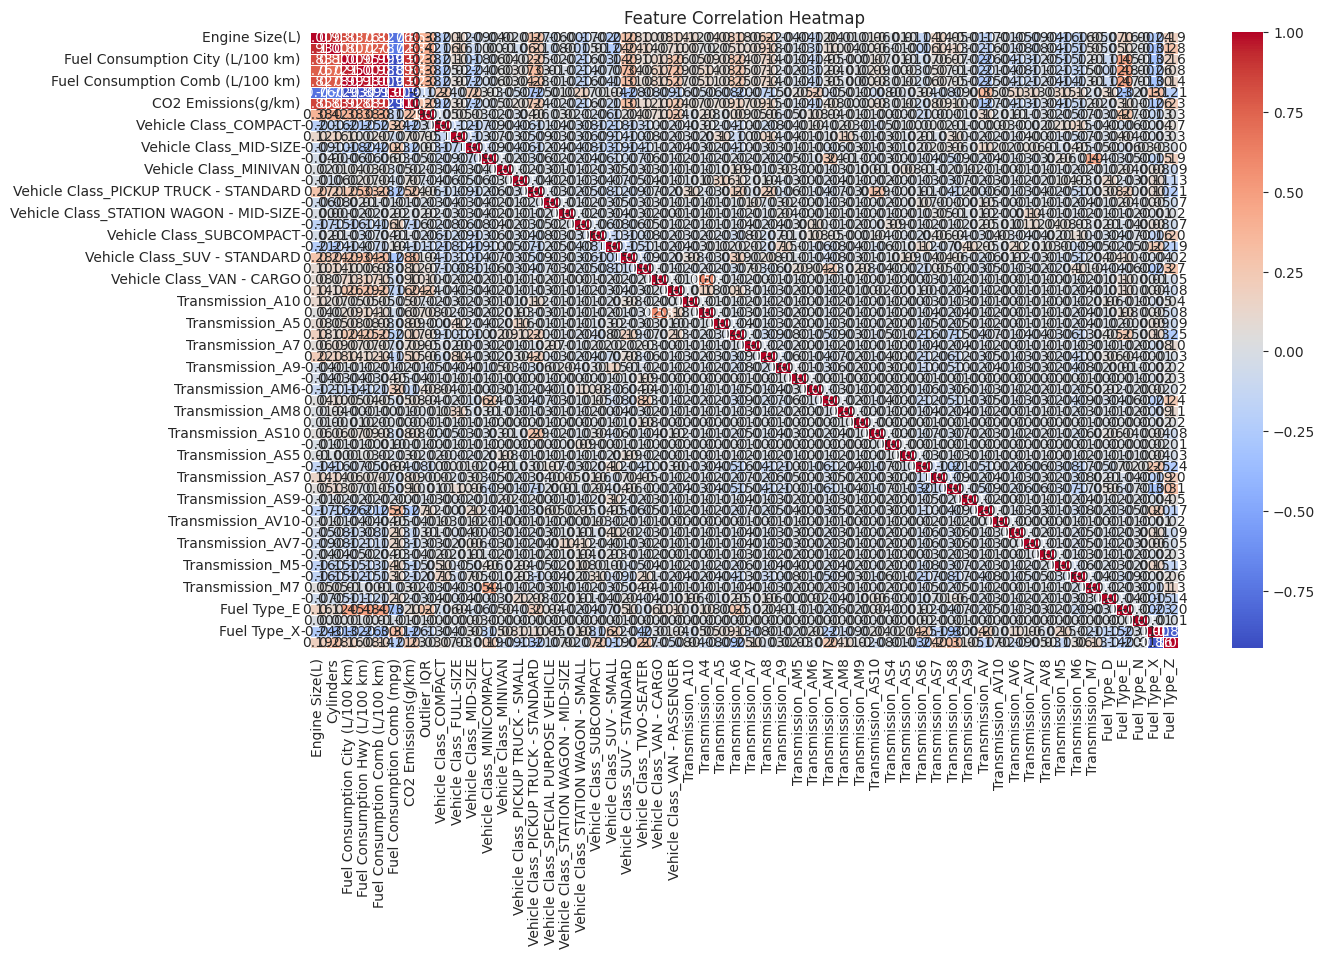

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#set style
sns.set_style("whitegrid")

# Plot correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
def check_missing_values(df):
  missing_values_count= df.isnull().sum()
  return missing_values_count
missing_values= check_missing_values(df)
print(missing_values)

Engine Size(L)                            0
Cylinders                                 0
Fuel Consumption City (L/100 km)          0
Fuel Consumption Hwy (L/100 km)           0
Fuel Consumption Comb (L/100 km)          0
Fuel Consumption Comb (mpg)               0
CO2 Emissions(g/km)                       0
Outlier_IQR                               0
Vehicle Class_COMPACT                     0
Vehicle Class_FULL-SIZE                   0
Vehicle Class_MID-SIZE                    0
Vehicle Class_MINICOMPACT                 0
Vehicle Class_MINIVAN                     0
Vehicle Class_PICKUP TRUCK - SMALL        0
Vehicle Class_PICKUP TRUCK - STANDARD     0
Vehicle Class_SPECIAL PURPOSE VEHICLE     0
Vehicle Class_STATION WAGON - MID-SIZE    0
Vehicle Class_STATION WAGON - SMALL       0
Vehicle Class_SUBCOMPACT                  0
Vehicle Class_SUV - SMALL                 0
Vehicle Class_SUV - STANDARD              0
Vehicle Class_TWO-SEATER                  0
Vehicle Class_VAN - CARGO       

In [ ]:
#although I recheck for the missing values, I have reconfirmed that there are no any missing values

In [ ]:
df.nunique()

,0
Engine Size(L),51
Cylinders,8
Fuel Consumption City (L/100 km),211
Fuel Consumption Hwy (L/100 km),143
Fuel Consumption Comb (L/100 km),181
Fuel Consumption Comb (mpg),54
CO2 Emissions(g/km),331
Outlier_IQR,2
Vehicle Class_COMPACT,2
Vehicle Class_FULL-SIZE,2


Define Features and Target Variable

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

features = [
    "Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)",
    "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)",
    "Fuel Consumption Comb (mpg)"
]

target="CO2 Emissions(g/km)"

# X= df[features].values
# y= df[target].values.reshape(-1,1)
# Saperating data into features and target
X = df.iloc[:,1:]
y = df.iloc[:, :1]


In [ ]:
# Normalize the data into same scale (using min max scaler)
def normalize(data):
    normalization = data.copy()
    normalization = normalization.select_dtypes(include = np.number)
    for col in normalization.columns:
        normalization[col] = (normalization[col] - normalization[col].min()) / (normalization[col].max() - normalization[col].min())
    return normalization
# # Standardize data(features scaling)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(y)

In [ ]:
norm_X = normalize(X)
norm_X.head(5) # Displaying features value

,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742
1,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427
2,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897
3,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239
4,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)



# Print dataset shapes to verify the split
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")



Training Set: (5908, 55), Testing Set: (1477, 55)


In [ ]:

# Train Linear Regression Model(recursive feature Elimination"RFE")
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Predictions
y_pred_lr = lin_reg.predict(X_test)

# Implement MSE, RMSE, and R² manually
def mse_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse_manual(y_true, y_pred):
    return np.sqrt(mse_manual(y_true, y_pred))

def r2_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Compute manually
mse_manual_value = mse_manual(Y_test.values, y_pred_lr)
rmse_manual_value = rmse_manual(Y_test.values, y_pred_lr)
r2_manual_value = r2_manual(Y_test.values, y_pred_lr)



print("Manual Computation:\n")
print(f"MSE: {mse_manual_value:.4f}, RMSE: {rmse_manual_value:.4f}, R²: {r2_manual_value:.4f}")


Manual Computation:

MSE: 0.1552, RMSE: 0.3939, R²: 0.9126


Verify with sklearn

In [ ]:

# Verify with sklearn
mse_sklearn = mean_squared_error(Y_test, y_pred_lr)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(Y_test, y_pred_lr)

print("\nSklearn Computation:")
print(f"MSE: {mse_sklearn:.4f}, RMSE: {rmse_sklearn:.4f}, R²: {r2_sklearn:.4f}")





Sklearn Computation:
MSE: 0.1552, RMSE: 0.3939, R²: 0.9126


8. Build Other Models ( Random Forest)
python


In [ ]:
# Revalidation with Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, Y_train.values.ravel())
y_pred_rf = rf_reg.predict(X_test)

# Compare models
mse_rf = mean_squared_error(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

print("\nRandom Forest Model Performance:")
print(f"MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")



Random Forest Model Performance:
MSE: 0.0284, RMSE: 0.1686, R²: 0.9840


Visualizations


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
Y_train = Y_train.squeeze()
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Best Model
best_rf = grid_search.best_estimator_

# Evaluate Optimized Model
best_rf_pred = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(Y_test, best_rf_pred)
r2_best_rf = r2_score(Y_test, best_rf_pred)

print(f"Optimized Random Forest - MSE: {mse_best_rf}, R²: {r2_best_rf}")


Optimized Random Forest - MSE: 0.028441223268606017, R²: 0.9839865614151273


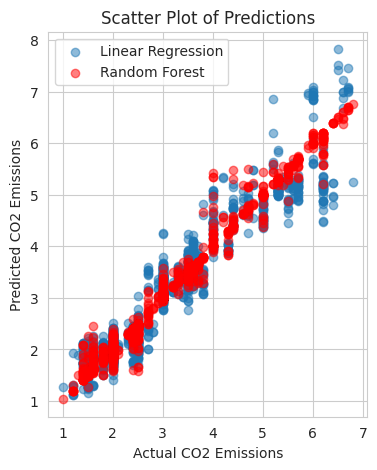

In [ ]:
# Visualizations
plt.figure(figsize=(14, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(Y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(Y_test, y_pred_rf, alpha=0.5, label="Random Forest", color='red')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Scatter Plot of Predictions")
plt.legend()


Text(0.5, 1.0, 'MSE Comparison')

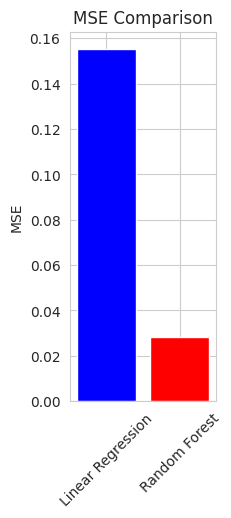

In [ ]:
# Bar plot
plt.subplot(1, 3, 2)
bar_labels = ['Linear Regression', 'Random Forest']
mse_values = [mse_sklearn, mse_rf]
plt.bar(bar_labels, mse_values, color=['blue', 'red'])
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.title("MSE Comparison")

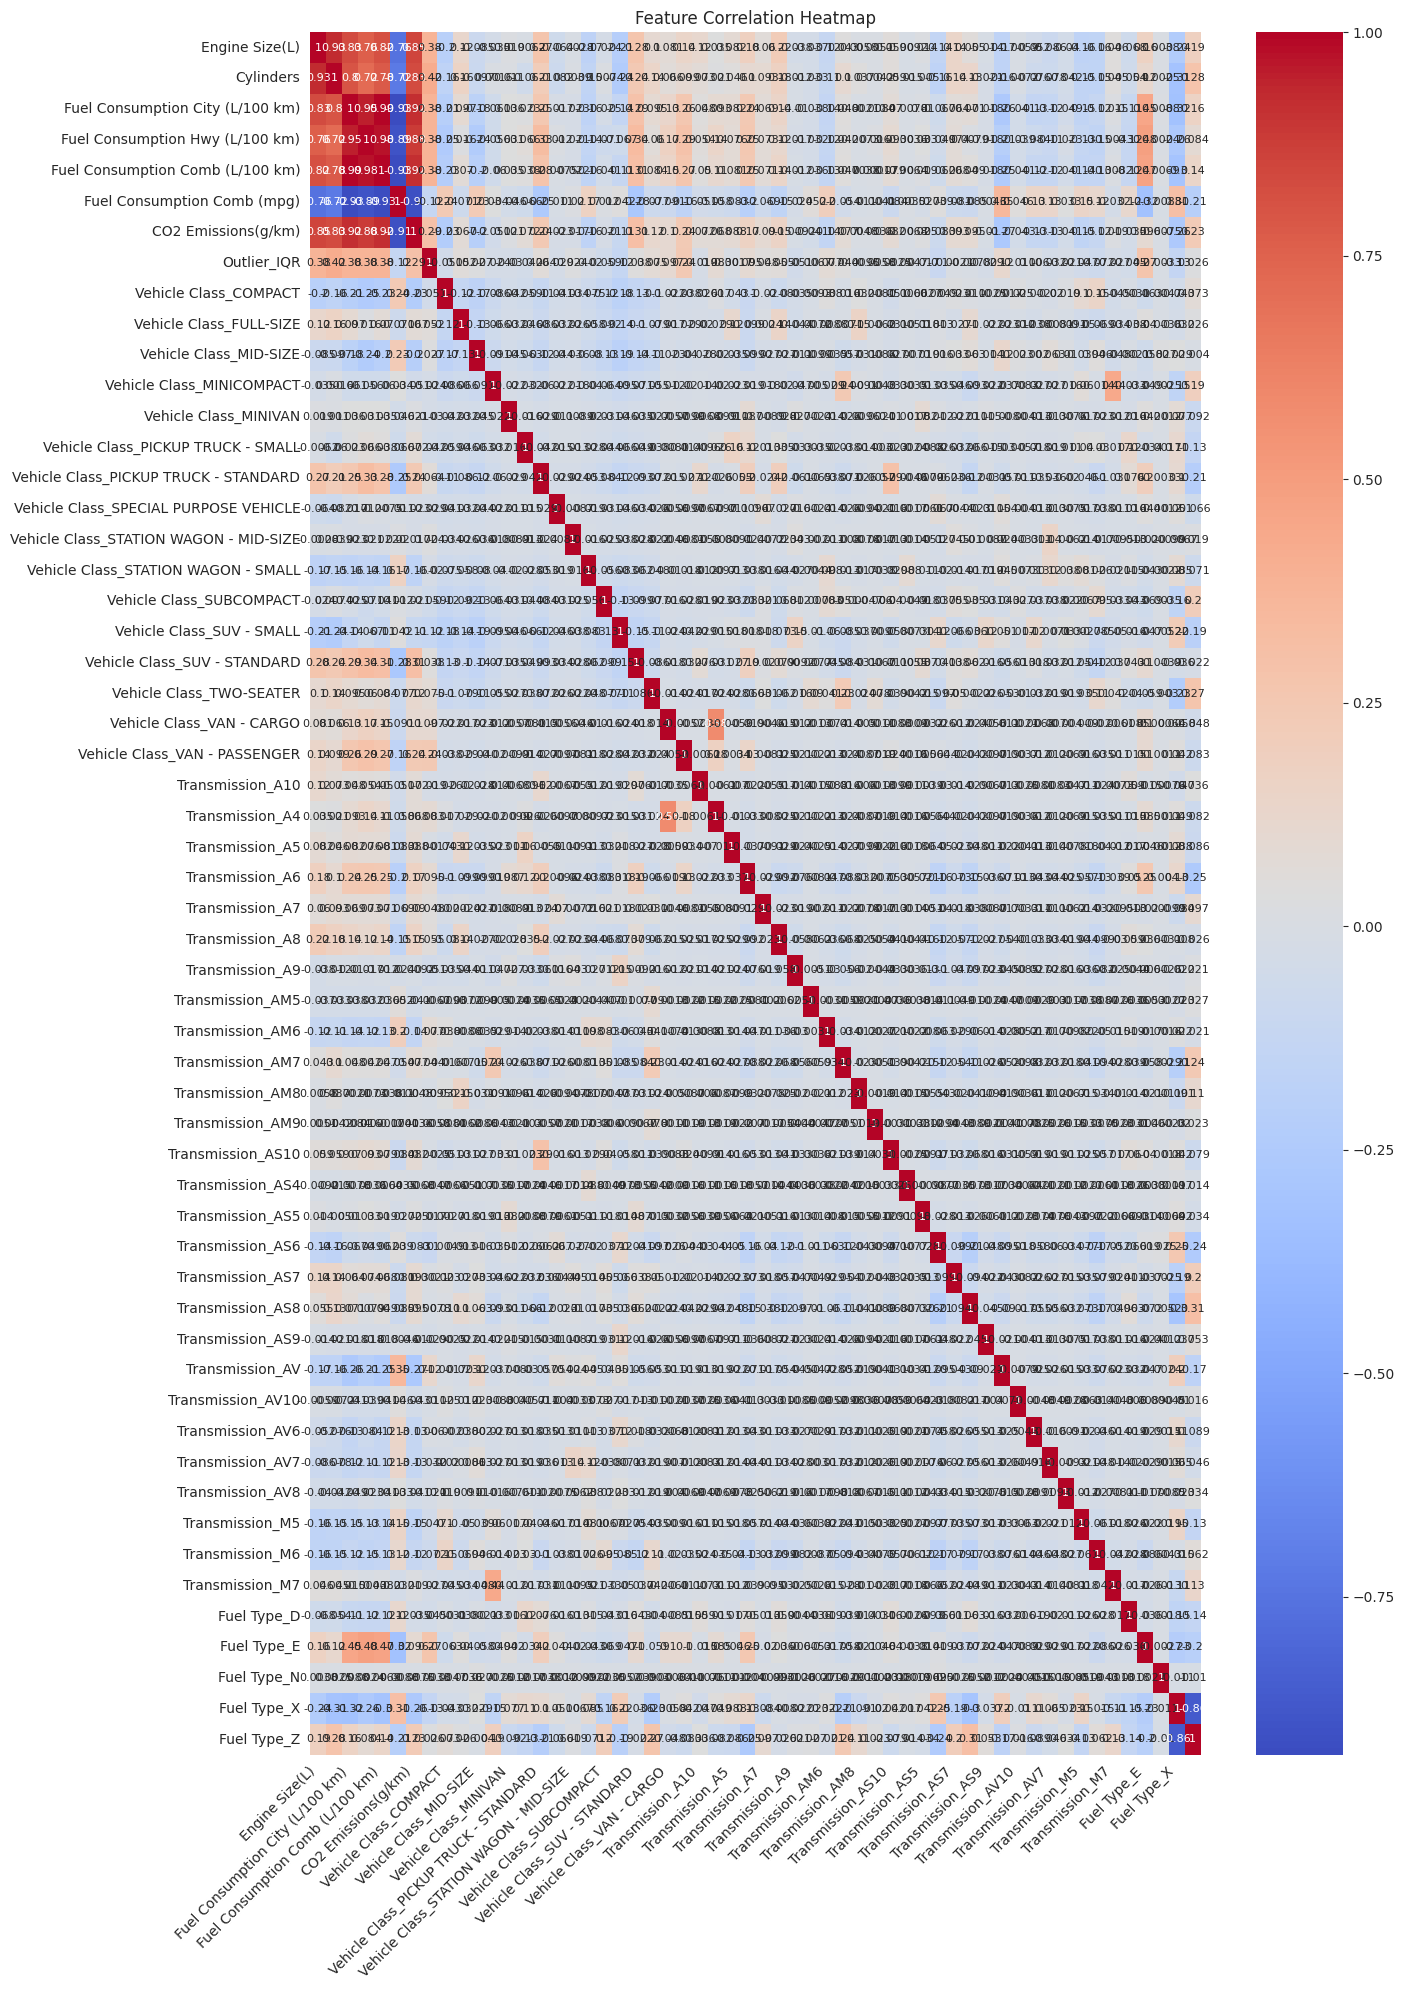

In [ ]:
#Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size for better readability
plt.figure(figsize=(40, 20))

plt.subplot(1, 3, 3)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 8})  # Reduce annotation font size
plt.title("Feature Correlation Heatmap")

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
lin_reg= LinearRegression()
rfe = RFE (lin_reg, n_features_to_select=5)
X_train_selected = rfe.fit_transform(X_train, Y_train)
X_test_selected = rfe.transform(X_test)
all_features = X_train.columns
# Get the selected features using the original DataFrame 'df' and rfe.support_
selected_features = all_features[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Cylinders', 'Vehicle Class_VAN - CARGO', 'Transmission_A10',
       'Transmission_A5', 'Transmission_AS5'],
      dtype='object')


In [ ]:
# Train Linear Regression Model
lin_reg.fit(X_train_selected, Y_train)

# Make predictions
y_pred_lr = lin_reg.predict(X_test_selected)

# Evaluate model performance
mse_lr = mean_squared_error(Y_test, y_pred_lr)
r2_lr = r2_score(Y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")

Linear Regression - MSE: 0.24207154425291394, R²: 0.8637049549370764


 Build Decision Tree & Random Forest Models

In [ ]:
# Train Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_selected, Y_train)
y_pred_dt = dt_reg.predict(X_test_selected)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_selected, Y_train)
y_pred_rf = rf_reg.predict(X_test_selected)

# Print predictions
print("Decision Tree Predictions:", y_pred_dt)
print("Random Forest Predictions:", y_pred_rf)

Decision Tree Predictions: [3.36049448 5.13124415 5.13124415 ... 2.00117188 3.36049448 2.00117188]
Random Forest Predictions: [3.35965825 5.13209823 5.13209823 ... 2.00148244 3.35965825 2.00148244]


In [ ]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train_selected, Y_train)
best_dt = grid_search_dt.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_selected, Y_train)
best_rf = grid_search_rf.best_estimator_
print(best_rf)

RandomForestRegressor(n_estimators=200, random_state=42)
